<a href="https://colab.research.google.com/github/sherazshakar6/Customer-segmentation/blob/main/Assigment_no_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Removing Duplicates with Space Constraint:

In [1]:
def remove_duplicates(arr):
    arr.sort()  # Sort the array to group duplicates
    write_index = 1  # Pointer for unique elements

    for i in range(1, len(arr)):
        if arr[i] != arr[write_index - 1]:  # Check if current element is unique
            arr[write_index] = arr[i]  # Move unique element to write_index
            write_index += 1  # Increment write_index

    return arr[:write_index]  # Return array with unique elements

# Example usage
arr = [4, 2, 5, 2, 3, 4, 1]
print(remove_duplicates(arr))  # Output: [1, 2, 3, 4, 5]

[1, 2, 3, 4, 5]


Special Index Search Using Divide and Conquer:

In [2]:
def special_index_search(A, left, right):
    # Base case: If the left index exceeds the right index, no valid index exists
    if left > right:
        return -1  # Return -1 to indicate no such index was found

    # Step 1: Calculate the middle index
    mid = (left + right) // 2  # Divide the array into two halves

    # Step 2: Check if the middle element satisfies the condition A[mid] == 3 * mid - 2
    if A[mid] == 3 * mid - 2:
        return mid  # If condition is satisfied, return the index mid

    # Step 3: If A[mid] > 3 * mid - 2, search the left half of the array
    elif A[mid] > 3 * mid - 2:
        return special_index_search(A, left, mid - 1)  # Recursively search the left half

    # Step 4: If A[mid] < 3 * mid - 2, search the right half of the array
    else:
        return special_index_search(A, mid + 1, right)  # Recursively search the right half

# Example usage
A = [-5, -1, 2, 5, 10, 15]  # Sorted array
result = special_index_search(A, 0, len(A) - 1)  # Start search from index 0 to len(A) - 1
print(result if result != -1 else "No such index found")  # Output: 2 (since A[2] = 2 and 3*2 - 2 = 4)

4


Running Time Analysis of Quicksort

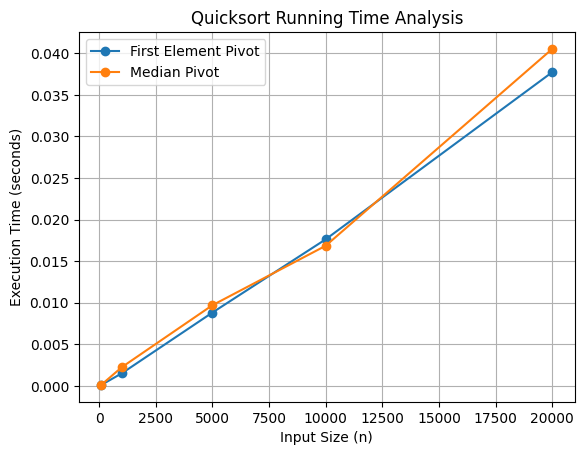

In [3]:
import time
import random
import matplotlib.pyplot as plt

# Quicksort with first element as pivot
def quicksort_first(arr):
    # Base case: If the array has 1 or 0 elements, it's already sorted
    if len(arr) <= 1:
        return arr

    # Step 1: Choose the first element as the pivot
    pivot = arr[0]

    # Step 2: Partition the array into elements less than or equal to the pivot
    less = [x for x in arr[1:] if x <= pivot]

    # Step 3: Partition the array into elements greater than the pivot
    greater = [x for x in arr[1:] if x > pivot]

    # Step 4: Recursively sort the "less" and "greater" partitions
    return quicksort_first(less) + [pivot] + quicksort_first(greater)

# Quicksort with median as pivot
def quicksort_median(arr):
    # Base case: If the array has 1 or 0 elements, it's already sorted
    if len(arr) <= 1:
        return arr

    # Step 1: Choose the median of the first, middle, and last elements as the pivot
    pivot = sorted([arr[0], arr[len(arr)//2], arr[-1]])[1]

    # Step 2: Partition the array into elements less than the pivot
    less = [x for x in arr if x < pivot]

    # Step 3: Partition the array into elements equal to the pivot
    equal = [x for x in arr if x == pivot]

    # Step 4: Partition the array into elements greater than the pivot
    greater = [x for x in arr if x > pivot]

    # Step 5: Recursively sort the "less" and "greater" partitions
    return quicksort_median(less) + equal + quicksort_median(greater)

# Measure execution time for different input sizes
def measure_time(sort_func, arr):
    start_time = time.time()  # Record the start time
    sort_func(arr)  # Run the sorting algorithm
    return time.time() - start_time  # Return the elapsed time

# Generate random arrays of different sizes
input_sizes = [100, 1000, 5000, 10000, 20000]  # Input sizes to test
first_pivot_times = []  # Store execution times for first pivot
median_pivot_times = []  # Store execution times for median pivot

for size in input_sizes:
    # Generate a random array of the given size
    arr = [random.randint(0, 10000) for _ in range(size)]

    # Measure time for first pivot Quicksort
    first_pivot_times.append(measure_time(quicksort_first, arr.copy()))

    # Measure time for median pivot Quicksort
    median_pivot_times.append(measure_time(quicksort_median, arr.copy()))

# Plot the results
plt.plot(input_sizes, first_pivot_times, label="First Element Pivot", marker='o')  # Plot first pivot times
plt.plot(input_sizes, median_pivot_times, label="Median Pivot", marker='o')  # Plot median pivot times
plt.xlabel("Input Size (n)")  # Label for the x-axis
plt.ylabel("Execution Time (seconds)")  # Label for the y-axis
plt.title("Quicksort Running Time Analysis")  # Title of the graph
plt.legend()  # Show legend
plt.grid(True)  # Add grid lines
plt.savefig("quicksort_graph.png")  # Save the graph as an image
plt.show()  # Display the graph